# 导入数据

In [ ]:
!git clone https://github.com/sunyingjian/tutorials-2016.git

Cloning into 'tutorials-2016'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161
Receiving objects: 100% (161/161), 16.86 MiB | 15.38 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
!git clone https://github.com/sunyingjian/numpy-.git

Cloning into 'numpy-'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 415 (delta 3), reused 0 (delta 0), pack-reused 403
Receiving objects: 100% (415/415), 202.24 MiB | 27.62 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Checking out files: 100% (206/206), done.


In [ ]:
! /opt/bin/nvidia-smi

Mon Feb  1 06:22:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
  !pip install tf-nightly

     |████████████████████████████████| 403.7MB 40kB/s 
     |████████████████████████████████| 471kB 60.6MB/s 
     |████████████████████████████████| 4.0MB 51.1MB/s 
     |████████████████████████████████| 4.0MB 52.3MB/s 
     |████████████████████████████████| 5.9MB 58.2MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
%matplotlib inline

In [7]:
training_data = pd.read_csv('/content/numpy-/美国分井/train_data_处理完成 (1).csv')
blind_data = pd.read_csv('/content/numpy-/美国分井/blind_data_处理完成.csv')

In [10]:
blind = pd.read_csv('/content/numpy-/美国油田/blind_data_wellname.csv')

In [8]:
training_data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Well Name
0,0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0.557385,0.0,1.000000,3,7
1,1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0.494046,0.0,0.978788,3,7
2,2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0.430707,0.0,0.956566,3,7
3,3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0.418039,0.0,0.935354,3,7
4,4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0.405371,0.0,0.914141,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,3227,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,0.432860,1.0,0.681818,5,0
3228,3228,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,0.398277,1.0,0.673737,5,0
3229,3229,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,0.378769,1.0,0.665657,5,0
3230,3230,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,0.373955,1.0,0.657576,5,0


In [11]:
training_data1 = pd.read_csv('/content/numpy-/block_TCN_处理完成.csv')

In [12]:
training_data1

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Well Name
0,0.076923,0.000000,0.575189,0.289898,0.464680,0.348468,0.385598,0,1.000000,3,8
1,0.076923,0.001996,0.604475,0.272564,0.647994,0.433656,0.373814,0,0.973764,3,8
2,0.076923,0.003992,0.617873,0.270173,0.690625,0.473574,0.347765,0,0.948537,3,8
3,0.076923,0.005988,0.623511,0.270173,0.669310,0.488738,0.344505,0,0.922301,3,8
4,0.076923,0.007984,0.612382,0.265989,0.618152,0.473351,0.343765,0,0.896065,3,8
...,...,...,...,...,...,...,...,...,...,...,...
900,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,0.380910,1,0.399596,4,9
901,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,0.395389,1,0.387487,6,9
902,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,0.408255,1,0.375378,6,9
903,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,0.402142,1,0.363269,6,9


In [13]:
training_data = training_data.drop(columns='Unnamed: 0')

In [15]:
training_data = pd.concat([training_data,training_data1])

In [16]:
training_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Well Name
0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0.557385,0.0,1.000000,3,7
1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0.494046,0.0,0.978788,3,7
2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0.430707,0.0,0.956566,3,7
3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0.418039,0.0,0.935354,3,7
4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0.405371,0.0,0.914141,3,7
...,...,...,...,...,...,...,...,...,...,...,...
900,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,0.380910,1.0,0.399596,4,9
901,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,0.395389,1.0,0.387487,6,9
902,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,0.408255,1.0,0.375378,6,9
903,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,0.402142,1.0,0.363269,6,9


In [17]:
training_data = training_data.reset_index()

In [18]:
training_data

,index,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Well Name
0,0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0.557385,0.0,1.000000,3,7
1,1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0.494046,0.0,0.978788,3,7
2,2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0.430707,0.0,0.956566,3,7
3,3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0.418039,0.0,0.935354,3,7
4,4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0.405371,0.0,0.914141,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4132,900,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,0.380910,1.0,0.399596,4,9
4133,901,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,0.395389,1.0,0.387487,6,9
4134,902,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,0.408255,1.0,0.375378,6,9
4135,903,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,0.402142,1.0,0.363269,6,9


In [20]:
training_data = training_data.drop(columns='index')

In [21]:
train_data = training_data

In [22]:
training_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Well Name
0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0.557385,0.0,1.000000,3,7
1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0.494046,0.0,0.978788,3,7
2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0.430707,0.0,0.956566,3,7
3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0.418039,0.0,0.935354,3,7
4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0.405371,0.0,0.914141,3,7
...,...,...,...,...,...,...,...,...,...,...,...
4132,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,0.380910,1.0,0.399596,4,9
4133,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,0.395389,1.0,0.387487,6,9
4134,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,0.408255,1.0,0.375378,6,9
4135,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,0.402142,1.0,0.363269,6,9


In [23]:
blind_data = blind_data.drop(columns=['Unnamed: 0','Well Name'])

In [24]:
train_data = train_data.drop(columns=['Well Name'])

## 对训练集进行处理

In [25]:
train_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0.557385,0.0,1.000000,3
1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0.494046,0.0,0.978788,3
2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0.430707,0.0,0.956566,3
3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0.418039,0.0,0.935354,3
4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0.405371,0.0,0.914141,3
...,...,...,...,...,...,...,...,...,...,...
4132,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,0.380910,1.0,0.399596,4
4133,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,0.395389,1.0,0.387487,6
4134,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,0.408255,1.0,0.375378,6
4135,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,0.402142,1.0,0.363269,6


In [26]:
training_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Well Name
0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0.557385,0.0,1.000000,3,7
1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0.494046,0.0,0.978788,3,7
2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0.430707,0.0,0.956566,3,7
3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0.418039,0.0,0.935354,3,7
4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0.405371,0.0,0.914141,3,7
...,...,...,...,...,...,...,...,...,...,...,...
4132,0.923077,0.992016,0.555516,0.335326,0.645820,0.398800,0.380910,1.0,0.399596,4,9
4133,0.923077,0.994012,0.665442,0.361626,0.612994,0.411066,0.395389,1.0,0.387487,6,9
4134,0.923077,0.996008,0.343731,0.371189,0.528542,0.474867,0.408255,1.0,0.375378,6,9
4135,0.923077,0.998004,0.980854,0.325762,0.570746,0.474867,0.402142,1.0,0.363269,6,9


In [27]:
training_data = training_data.values

In [28]:
seq_length = 100
data_ = []
for i in range(len(train_data)-seq_length):
  if training_data[i,-1]!=training_data[i+seq_length,-1]:
    continue
  data_.append(train_data.iloc[i:i+seq_length])

In [29]:
data_ = np.array([df.values for df in data_])

In [30]:
data_.shape

(3169, 100, 10)

In [31]:
#np.random.shuffle(data_)

In [32]:
data_.shape

(3169, 100, 10)

In [33]:
X = data_[:,:,:9]

In [34]:
X.shape

(3169, 100, 9)

In [35]:
Y = data_[:,:,-1]-1

In [36]:
Y=np.array(Y)

In [37]:
Y.shape

(3169, 100)

In [38]:
Y=tf.keras.utils.to_categorical(Y)

## 测试集

In [39]:
blind = blind.values

In [40]:
data_test = []
for i in range(len(blind_data)-seq_length):
  if blind[i,-1]!=blind[i+seq_length,-1]:
    continue
  data_test.append(blind_data.iloc[i:i+seq_length])

In [41]:
data_test = np.array([df.values for df in data_test])

In [42]:
data_test.shape

(630, 100, 10)

In [43]:
data_test_1 = data_test[:,:,:9]

In [44]:
test_y_1 = data_test[:,:,-1]-1

In [45]:
test_y_1 =np.array(test_y_1)

In [46]:
test_y_1=tf.keras.utils.to_categorical(test_y_1)

In [47]:
#np.random.shuffle(data_test)

In [48]:
test_x = data_test[:,:,:9]

In [49]:
test_x.shape

(630, 100, 9)

In [50]:
test_y = data_test[:,:,-1]-1

In [51]:
test_y =np.array(test_y)

In [52]:
test_y=tf.keras.utils.to_categorical(test_y)

# 设计模型

## transform编码器

In [53]:
input = tf.keras.Input(shape=(100,9))

In [180]:
ainput = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True))(input)
x = tf.keras.layers.MultiHeadAttention(num_heads=3, key_dim=16, value_dim=16,dropout=0.3)(ainput,ainput)
x = tf.keras.layers.add([ainput,x])
x1 = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dense(128,activation='relu',kernel_initializer="he_uniform",kernel_regularizer='l2')(x1)
x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.add([x,x1])
x1 = tf.keras.layers.LayerNormalization()(x)
x1 = tf.keras.layers.Dropout(0.3)(x1)
#x = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64, value_dim=64,dropout=0.5)(x1,x1)
#x = tf.keras.layers.add([x1,x])
#x1 = tf.keras.layers.LayerNormalization()(x)
#x = tf.keras.layers.Dense(64,activation='relu',kernel_initializer="he_uniform",kernel_regularizer='l2')(x1)
#x = tf.keras.layers.Dense(64)(x)
#x = tf.keras.layers.add([x,x1])
#x = tf.keras.layers.LayerNormalization()(x)
#x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128,activation='relu')(x1)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='linear')(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(9,activation='softmax'))(x)
#x = tf.keras.layers.Dense(9,activation='softmax')(x)
model = tf.keras.Model(inputs = input, outputs = x)

In [181]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 9)]     0                                            
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 100, 64)      10752       input_1[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_4 (MultiHe (None, 100, 64)      12496       bidirectional_4[0][0]            
                                                                 bidirectional_4[0][0]            
__________________________________________________________________________________________________
add_8 (Add)                     (None, 100, 64)      0           bidirectional_4[0][0]      

In [182]:
#学习率衰减
learning_rate=0.001
def scheduler(epoch):
  if epoch<=200:
    learning_rate=0.001
  elif epoch<=300:
    learning_rate=0.0008
  elif epoch<=400:
    learning_rate=0.0006
  else:
    learning_rate=0.0005
  return learning_rate

Lr_change=tf.keras.callbacks.ReduceLROnPlateau('val_loss',patience = 10, factor = 0.5, min_lr=0.0001)
#保存准确率最好的模型
from keras.callbacks import ModelCheckpoint
filepath="best_weight.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max')
#model.save_weights('a.h5',overwrite=True, save_format=None)
#Adam优化器
Adam=keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=Adam,loss='categorical_crossentropy',
              metrics=['acc',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])


In [183]:
history=model.fit( X,Y,batch_size=128,
         epochs=50, 
         callbacks=[Lr_change,checkpoint],
         validation_data=(test_x,test_y))

Epoch 1/50
25/25 [==============================] - 13s 379ms/step - loss: 4.4017 - acc: 0.2755 - precision_4: 0.3861 - recall_4: 0.0448 - val_loss: 3.6208 - val_acc: 0.4537 - val_precision_4: 0.5547 - val_recall_4: 0.1593

Epoch 00001: val_acc improved from -inf to 0.45368, saving model to best_weight.h5
Epoch 2/50
25/25 [==============================] - 8s 330ms/step - loss: 3.1866 - acc: 0.5004 - precision_4: 0.6236 - recall_4: 0.3138 - val_loss: 3.0846 - val_acc: 0.5357 - val_precision_4: 0.6689 - val_recall_4: 0.3339

Epoch 00002: val_acc improved from 0.45368 to 0.53565, saving model to best_weight.h5
Epoch 3/50
25/25 [==============================] - 8s 334ms/step - loss: 2.5940 - acc: 0.5931 - precision_4: 0.6929 - recall_4: 0.4509 - val_loss: 2.6881 - val_acc: 0.5655 - val_precision_4: 0.6337 - val_recall_4: 0.4275

Epoch 00003: val_acc improved from 0.53565 to 0.56546, saving model to best_weight.h5
Epoch 4/50
25/25 [==============================] - 9s 342ms/step - loss: 2

KeyboardInterrupt: ignored

In [184]:
new_model = tf.keras.models.load_model('/content/best_weight.h5')

# 数据预测

In [185]:
blind1 = pd.read_csv('/content/blind1.csv')

In [186]:
blind1

,Unnamed: 0,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,0,0.076923,1,0.000000,0.260297,0.555949,0.480315,0.298338,0.351236,0,1.000000,3
1,1,0.076923,1,0.001418,0.312971,0.533165,0.606299,0.342436,0.291825,0,0.977710,3
2,2,0.076923,1,0.002837,0.340071,0.523544,0.720472,0.398406,0.225998,0,0.955420,3
3,3,0.076923,1,0.004255,0.329379,0.537215,0.724409,0.386533,0.205323,0,0.932118,3
4,4,0.076923,1,0.005674,0.306824,0.560000,0.692913,0.356004,0.215542,0,0.909828,3
...,...,...,...,...,...,...,...,...,...,...,...,...
469,469,0.923077,1,0.665248,0.267050,0.591899,0.586614,0.452680,0.354087,1,0.281662,4
470,470,0.923077,1,0.666667,0.267050,0.630886,0.551181,0.467944,0.338403,1,0.274569,4
471,471,0.923077,1,0.668085,0.267050,0.683544,0.543307,0.471336,0.340779,1,0.266464,4
472,472,0.923077,1,0.669504,0.267050,0.729620,0.523622,0.473033,0.337452,1,0.259372,5


In [187]:
blind_2 = pd.read_csv('/content/blind2.csv')

In [188]:
blind_2

,Unnamed: 0,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,0,0.0,0,0.466667,0.180629,0.664810,0.504134,0.316147,0.273764,1,1.000000,6
1,1,0.0,0,0.468085,0.107493,0.682025,0.471850,0.214383,0.408270,1,0.990881,8
2,2,0.0,0,0.469504,0.067867,0.702785,0.453346,0.104817,0.521150,1,0.980750,8
3,3,0.0,0,0.470922,0.035642,0.726582,0.382677,0.066655,0.585789,1,0.971631,8
4,4,0.0,0,0.472340,0.034668,0.740759,0.362992,0.060210,0.601236,1,0.961499,8
...,...,...,...,...,...,...,...,...,...,...,...,...
351,351,1.0,0,0.994326,0.355327,0.517468,0.548819,0.484905,0.249049,0,0.634245,3
352,352,1.0,0,0.995745,0.368654,0.509873,0.569291,0.505258,0.238831,0,0.605876,3
353,353,1.0,0,0.997163,0.376500,0.505316,0.600787,0.506275,0.250713,0,0.577508,3
354,354,1.0,0,0.998582,0.378828,0.501266,0.627362,0.513569,0.247386,0,0.550152,3


In [189]:
def check(data):
  data = data.drop(columns=['Unnamed: 0','Well Name'])
  data_test = []
  for i in range(len(data)-seq_length):
    data_test.append(data.iloc[i:i+seq_length])
  data_test = np.array([df.values for df in data_test])
  print(data_test.shape)
  data_x = data_test[:,:,:9]
  data_y = data_test[:,:,-1]-1
  data_y = np.array(data_y)
  data_y = tf.keras.utils.to_categorical(data_y)

  return data_x,data_y

In [190]:
blind1_x,blind1_y = check(blind1)

(374, 100, 10)


In [191]:
blind2_x,blind2_y = check(blind_2)

(256, 100, 10)


In [192]:
pred_1 = new_model.predict(blind1_x)

In [193]:
pred_2 = new_model.predict(blind2_x)

In [194]:
import torch

In [195]:
pred_1.shape

(374, 100, 9)

## 处理1

In [196]:
def check1(pred):
  y_pred_1 = pred[:,50,:]
  y_pred_1_first = pred[0,:50,:]
  y_pred_1_last = pred[-1,50:,:]
  y_pred_1 = torch.from_numpy(y_pred_1)
  y_pred_1 = torch.topk(y_pred_1,1)[1].squeeze(1)
  y_pred_1 = y_pred_1.numpy()
  y_pred_1_first = torch.from_numpy(y_pred_1_first)
  y_pred_1_first = torch.topk(y_pred_1_first,1)[1].squeeze(1)
  y_pred_1_first = y_pred_1_first.numpy()
  y_pred_1_last = torch.from_numpy(y_pred_1_last)
  y_pred_1_last = torch.topk(y_pred_1_last,1)[1].squeeze(1)
  y_pred_1_last = y_pred_1_last.numpy()
  y_ture = np.append(y_pred_1_first,y_pred_1)
  y_true = np.append(y_ture,y_pred_1_last)
  return y_true

In [197]:
y_true_pred_1 = check1(pred_1)

In [198]:
y_true_pred_2 = check1(pred_2)

In [199]:
y_true_pred_1.shape

(474,)

In [200]:
y_pred_true = np.append(y_true_pred_1,y_true_pred_2)

In [201]:
y_pred_1 = pd.DataFrame(y_pred_true)

In [202]:
y_pred_1 = y_pred_1+1

In [203]:
y_pred_1.to_csv('transformer.csv')

In [204]:
blind_ = pd.read_csv('/content/numpy-/美国油田/blind_data.csv')

In [205]:
blind_

,Unnamed: 0,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3
3,3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3
4,4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3
...,...,...,...,...,...,...,...,...,...,...,...,...
825,825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3
827,827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3
828,828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3


In [206]:
y_test = blind_['Facies'].values

In [207]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [208]:
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred_1))
print('classification report')
print(metrics.classification_report(y_test, y_pred_1))
print('Accuracy : %f' % (metrics.accuracy_score(y_test, y_pred_1)))
print(precision_score(y_test, y_pred_1, average='weighted'))
print(recall_score(y_test, y_pred_1, average='weighted'))
print(f1_score(y_test, y_pred_1,average='weighted'))

confusion matrix
[[  0  19   1   0   0   0   0   0   0]
 [  0 120  34   0   0   1   0   4   0]
 [  0  28  59  18   1   3  36   9   0]
 [  0   0   0  46   8   5   0   6   0]
 [  0   0   2   1  31   3   2  10   0]
 [  0   0   0  19   5  59   1  43   0]
 [  0   0   0   0   5   6  15   0   0]
 [  0   0   4   7   2  19   4 173   3]
 [  0   0   0   0   0   0   0  18   0]]
classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.72      0.75      0.74       159
           3       0.59      0.38      0.46       154
           4       0.51      0.71      0.59        65
           5       0.60      0.63      0.61        49
           6       0.61      0.46      0.53       127
           7       0.26      0.58      0.36        26
           8       0.66      0.82      0.73       212
           9       0.00      0.00      0.00        18

    accuracy                           0.61       830
   macro avg 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
import pandas as pd

In [149]:
pd.crosstab(y_test,y_pred_true,rownames=['label'],colnames=['prediction'])

prediction,1,2,3,4,5,6,7,8
label,,,,,,,,
1,19,1,0,0,0,0,0,0
2,122,30,0,1,0,0,6,0
3,37,50,18,2,6,31,7,3
4,0,0,12,37,15,0,1,0
5,1,1,1,30,9,1,5,1
6,0,0,2,20,65,1,39,0
7,0,0,0,5,7,12,2,0
8,0,4,3,8,43,2,151,1
9,0,0,0,0,2,0,16,0


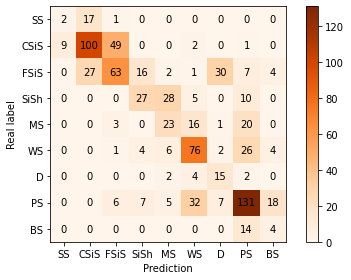

In [117]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['SS','CSiS','FSiS','SiSh','MS','WS','D','PS','BS']
confusion_matrix = np.array([(2,17,1,0,0,0,0,0,0),(9,100,49,0,0,2,0,1,0),(0,27,63,16,2,1,30,7,4),(0,0,0,27,28,5,0,10,0),(0,0,3,0,23,16,1,20,0),(0,0,1,4,6,76,2,26,4),(0,0,0,0,2,4,15,2,0),(0,0,6,7,5,32,7,131,18),(0,0,0,0,0,0,0,14,4)],dtype=np.int64)
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)  #按照像素显示出矩阵
#plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
 
thresh = confusion_matrix.max() / 2.
#iters = [[i,j] for i in range(len(classes)) for j in range((classes))]
#ij配对，遍历矩阵迭代器
iters = np.reshape([[[i,j] for j in range(9)] for i in range(9)],(confusion_matrix.size,2))
for i, j in iters:
    plt.text(j, i, format(confusion_matrix[i, j]),va='center',ha='center')   #显示对应的数字
 
plt.ylabel('Real label')
plt.xlabel('Prediction')
plt.tight_layout()
plt.savefig(fname="STUART.svg",format="svg")

In [118]:
plt.savefig(fname="STUART.svg",format="svg")

<Figure size 432x288 with 0 Axes>